# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.250910e+01     1.693849e+01
 * time: 0.00304412841796875
     1     6.155064e+01     9.904456e+00
 * time: 0.009015083312988281
     2     5.679248e+01     1.247610e+01
 * time: 0.022190093994140625
     3     4.039858e+01     9.707889e+00
 * time: 0.040060997009277344
     4     3.157254e+01     8.987928e+00
 * time: 0.0582730770111084
     5     2.932186e+01     8.462402e+00
 * time: 0.13422894477844238
     6     1.455850e+01     4.032076e+00
 * time: 0.15048003196716309
     7     1.040056e+01     1.633838e+00
 * time: 0.16332006454467773
     8     9.025740e+00     2.357273e+00
 * time: 0.17628216743469238
     9     8.731020e+00     4.481536e+00
 * time: 0.18676996231079102
    10     7.584765e+00     2.980226e+00
 * time: 0.20009994506835938
    11     7.076133e+00     2.679289e+00
 * time: 0.210313081741333
    12     6.751262e+00     2.459166e+00
 * time: 0.22095417976379395
    13     6.432661e+00     1.666349e+00
 * time:

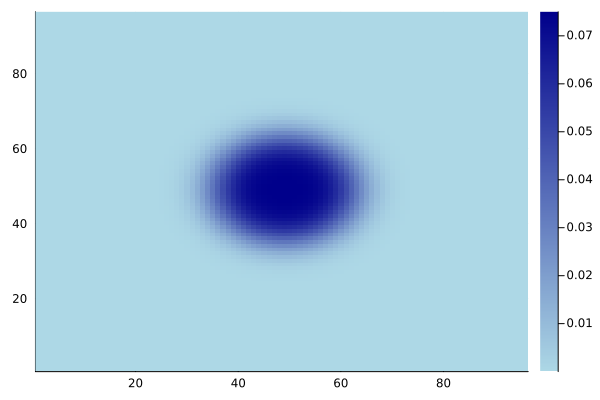

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)